# Part 01 BD-e2 Data Exploration

This notebook is used to examine how the geospatial infomration can be used to predict observed biomass from the Global Ecosystem Dynamic Investigation Sensor (GEDI). This notebook will:

1. Open GEDI csv table
2. Conduct data exploration
3. Conduct Feature Engineering
4. Add additional indices (optional)

# Install Packages

Install python packages that we will need for data exploration and Machine Learning

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

## Load Data

In [2]:
### *********** 20241127 added Ownership*******************
outPathCSV = "D:/Argus/BDe2/tables/Master_GEDI_EE_Kenobi_ObservedRemoteSensingValues_20241127.csv"
#Merged_Obiwan_pts_2022_2019_OutliersRemoved_MoransPositive_byYear
masterdf = pd.read_csv(outPathCSV)


Check for any duplicate values in dataset

In [3]:
dup = masterdf['OBJECTID'].duplicated().any()
print("Are there any duplicates?",dup)

print("Number of observations",len(masterdf))

Are there any duplicates? False
Number of observations 31467


## Data Exploration
In this section we are going to explorei the data we obtained from Google Earth Engine. This will include:
- Reconciling Invalide Values
- Adding New Indices

### Reconcile Invalid Values
Several indices can potential have "invalid values". Ex: NDVI can not exceed -1 or 1. These values will need to be dropped 

In [4]:
reflect = ['blue','green', 'red', 'nir', 'swir1', 'swir2']
indices = ['EVI','NBR','NDMI','NDVI','SAVI']
snow = ['NDSI']

In [5]:
for i in reflect:
    masterdf = masterdf.loc[~((masterdf[i] > 10000) | (masterdf[i] < 0))]
print("Optical Check",len(masterdf))

for j in indices:
    masterdf = masterdf.loc[~((masterdf[j] > 10000) | (masterdf[j] < -10000))]
print("Indices Check",len(masterdf))

for k in snow:
    masterdf = masterdf.loc[~((masterdf[k] > 0.1) & (masterdf[k] < 0.4))]    
print("Snow Filtering",len(masterdf))


Optical Check 31467
Indices Check 31467
Snow Filtering 29435


### Modify columns in table

In [7]:
# Update Index
masterdf2 = masterdf.set_index('OBJECTID')
masterdf2.index.names = [None]
masterdf = masterdf2
masterdf

#Update NA values in GAP Status Code
masterdf['GAP_StatusCode'] = masterdf['GAP_StatusCode'].fillna(0)
masterdf

,system_index,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,...,RH98_check,absElevCheck_v99,elevCheck_v99,gediCanopyCover,slopeCoverCheck,spi,twi,roughness,HeatLoadIndex,Ownership
1,19684,2019,0.890196,0,10,0,0,4758,-0.334307,20.052362,...,0.074935,16.052362,1.423155,6060,1,667.911072,528.708923,4459.314453,10896,Federal_Govt
2,20258,2019,0.733333,0,42,0,0,7151,-0.082763,67.985329,...,0.193668,12.985329,1.151241,4380,1,140.172409,731.227234,6816.921875,8828,State_Govt
3,20304,2019,0.568627,83,16,0,0,1507,0.297420,94.174171,...,0.192734,38.174171,3.384409,1416,1,-1831.085205,473.271240,5784.702148,8936,Industry
4,20313,2019,0.580392,20,18,0,0,6336,0.193652,87.120468,...,0.100850,32.120468,2.847706,3934,1,122.635162,623.823120,4226.656738,8466,Industry
5,20376,2019,0.654902,1,10,0,0,7014,-0.008698,104.948120,...,0.224362,23.948120,2.123169,7704,1,553.615662,852.332886,5602.263672,7598,State_Govt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31463,25054,2019,0.658824,0,2,0,0,7447,0.007616,127.239716,...,0.151811,30.239716,2.680964,7376,1,-317.489990,650.314880,6140.742188,8259,Private
31464,24621,2019,0.713725,1,8,0,1,7715,0.017415,21.903936,...,0.122192,28.903936,2.562537,8004,1,-144.724091,731.567505,5774.945801,8538,Private
31465,24988,2019,0.611765,0,46,0,0,7553,0.033935,46.272961,...,0.019654,33.272961,2.949882,6476,1,-683.784790,572.410706,6575.279297,7741,Private
31466,24778,2019,0.627451,0,4,0,0,7590,0.091627,43.407589,...,0.081263,26.407589,2.341219,7510,1,-551.663696,594.125916,5118.715820,8643,Private


count    29435.000000
mean       283.520367
std        172.735100
min          1.000000
25%        154.000000
50%        244.000000
75%        382.000000
max        944.000000
Name: agbd, dtype: float64

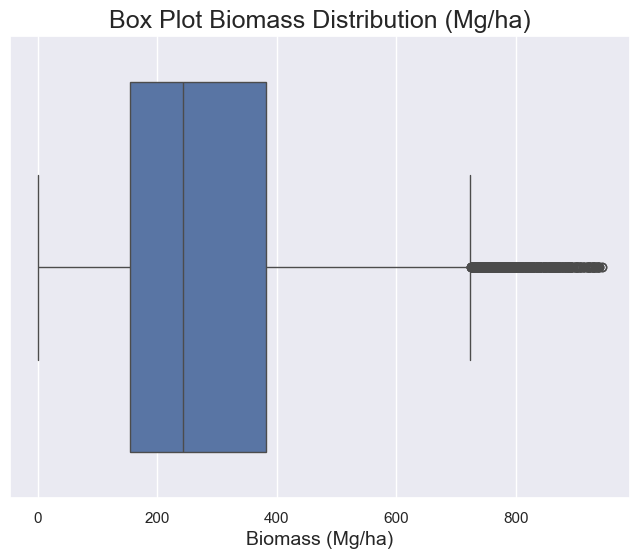

In [8]:
sns.boxplot(x = masterdf['agbd'])
plt.title("Box Plot Biomass Distribution (Mg/ha)", fontsize=18)
plt.xlabel("Biomass (Mg/ha)", fontsize=14)

masterdf['agbd'].describe()

### Pair Plots (Not Sure if needed)

In [9]:
spectralVar = ['brightness','greenness','wetness',
               'tcDistGW','tcDistBW','tcDistBG',
               'tcAngleGW','tcAngleBW','tcAngleBG',
               'NDMI','NBR','ExBlue','GLI',]



terrainVar = ['agbd','slope','FabDEM','cosAspect','sinAspect','tpi11','tpi21','tpi41']

textureVar = ['agbd','EVI_asm',
    'EVI_savg',
    'EVI_var',
    'EVI_corr',
    'EVI_idm',
    'EVI_sent',


    'tcDistBW_asm',
    'tcDistBW_savg',
    'tcDistBW_var',
    'tcDistBW_corr',
    'tcDistBW_idm',
    'tcDistBW_sent',]

In [10]:
# sns.pairplot(data = masterdf, y_vars = masterdf['agbd'], x_vars = masterdf[spectralVar])

## Revert One-Hot-Encoding for LightGBM

In [11]:
gnnNames = ['DouglasFir', 'HStF', 'Other_Hardwood','Red_Alder','Red_Cedar',  'nonForestType','notHarvestable']

gnnDF = masterdf[gnnNames]
gnnRevert = gnnDF.eq(1).idxmax(axis=1)
gnnRevert.columns=['gnn']

gnnRevertready = pd.DataFrame(gnnRevert, columns=['gnn']).astype('category')
gnnRevertready


,gnn
1,Red_Cedar
2,Red_Alder
3,HStF
4,HStF
5,HStF
...,...
31463,Red_Cedar
31464,DouglasFir
31465,HStF
31466,Red_Cedar


In [12]:
masterdf = masterdf.join(gnnRevertready, how = 'inner' )
masterdf[['DouglasFir', 'HStF', 'Other_Hardwood','Red_Alder','Red_Cedar',  'nonForestType','notHarvestable','gnn']]
masterdf

,system_index,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,...,absElevCheck_v99,elevCheck_v99,gediCanopyCover,slopeCoverCheck,spi,twi,roughness,HeatLoadIndex,Ownership,gnn
1,19684,2019,0.890196,0,10,0,0,4758,-0.334307,20.052362,...,16.052362,1.423155,6060,1,667.911072,528.708923,4459.314453,10896,Federal_Govt,Red_Cedar
2,20258,2019,0.733333,0,42,0,0,7151,-0.082763,67.985329,...,12.985329,1.151241,4380,1,140.172409,731.227234,6816.921875,8828,State_Govt,Red_Alder
3,20304,2019,0.568627,83,16,0,0,1507,0.297420,94.174171,...,38.174171,3.384409,1416,1,-1831.085205,473.271240,5784.702148,8936,Industry,HStF
4,20313,2019,0.580392,20,18,0,0,6336,0.193652,87.120468,...,32.120468,2.847706,3934,1,122.635162,623.823120,4226.656738,8466,Industry,HStF
5,20376,2019,0.654902,1,10,0,0,7014,-0.008698,104.948120,...,23.948120,2.123169,7704,1,553.615662,852.332886,5602.263672,7598,State_Govt,HStF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31463,25054,2019,0.658824,0,2,0,0,7447,0.007616,127.239716,...,30.239716,2.680964,7376,1,-317.489990,650.314880,6140.742188,8259,Private,Red_Cedar
31464,24621,2019,0.713725,1,8,0,1,7715,0.017415,21.903936,...,28.903936,2.562537,8004,1,-144.724091,731.567505,5774.945801,8538,Private,DouglasFir
31465,24988,2019,0.611765,0,46,0,0,7553,0.033935,46.272961,...,33.272961,2.949882,6476,1,-683.784790,572.410706,6575.279297,7741,Private,HStF
31466,24778,2019,0.627451,0,4,0,0,7590,0.091627,43.407589,...,26.407589,2.341219,7510,1,-551.663696,594.125916,5118.715820,8643,Private,Red_Cedar


## Add New Indices

In [13]:
# ###https://www.mdpi.com/2673-7418/3/1/12
blue = masterdf['blue']/10000
green = masterdf['green']/10000
red = masterdf['red']/10000
nir = masterdf['nir']/10000
swir1 = masterdf['swir1']/10000
swir2 = masterdf['swir2']/10000
NDVI = masterdf['NDVI']/10000

g = green/(red+green+blue)
r = red/(red+green+blue)
b = blue/(red+green+blue)

newIndiceDict = {
    'NDPI': ((nir-((0.56*red + (1-0.56)*swir2)))/(nir+((0.56*red + (1-0.56)*swir2))))*10000,
    'NDII': ((nir-swir1)/(nir+swir1))*10000,
    'IPCA': ((0.994*np.abs(red-blue)+0.961*np.abs(green-blue)+0.914*np.abs(green-red))*10000),
    'GLI': (((2*green-red-blue)/(-red-blue))*10000),
    'ExBlue': ((1.4*b-g))*10000,
    'ExGreen': (2*g-r-b)*10000,
    'ExRed': ((1.4*r-g))*10000,
    'NDSI':(green-swir1)/(green+swir1)*10000,
    'NDPI2':(nir-((0.74*red + (1-0.74)*swir2)))/(nir+((0.74*red + (1-0.74)*swir2)))*10000,
    'GCC':(green/(red+green+blue))*10000,
    'RCC':(red/(red+green+blue))*10000,
    'OSAVI':((nir-red)/(nir+red+0.16))*10000,
    'MSAVI': (0.5*((2*nir+1)-(np.sqrt((np.square(2*nir+1))-8*(nir-red)))))*10000,
    # 'PI': np.square(NDVI) - np.square(masterdf['NDII']),
    'RVI': ((nir/red)/100)*10000,
    'DVI': (nir-red)*10000,
    'GNDVI': ((nir-green)/(nir+green))*10000 ,
    'VARI': ((green-red)/(green+red-blue))*10000,
    'VEG': (green/((red**0.667)*(blue**0.333)).astype(float))*10000,
    'MGRVI': ((np.square(green)-np.square(red))/(np.square(green)+np.square(red)).astype(float))*10000,
    'RGBVI': ((np.square(green)-red*blue)/(np.square(green)+red*blue).astype(float))*10000
    
    
}

newIndicesList = ['NDPI','NDII','IPCA','GLI','ExBlue','ExGreen','ExRed']

for i in newIndicesList:
    masterdf[i] = newIndiceDict[i]

masterdf


# tcB = masterdf['brightness']
# tcG = masterdf['greenness']
# tcW = masterdf['wetness']

# tcB_mean = np.mean(tcB)
# tcG_mean = np.mean(tcG)
# tcW_mean = np.mean(tcW)

# tcB_std = np.std(tcB)
# tcG_std = np.std(tcG)
# tcW_std = np.std(tcW)

# tcBr = (tcB-tcB_std)/tcB_mean
# tcGr = (tcG-tcG_std)/tcG_mean
# tcWr = (tcW-tcW_std)/tcW_mean


# masterdf['tcDI'] = tcBr-(tcGr+tcWr)


,system_index,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,...,HeatLoadIndex,Ownership,gnn,NDPI,NDII,IPCA,GLI,ExBlue,ExGreen,ExRed
1,19684,2019,0.890196,0,10,0,0,4758,-0.334307,20.052362,...,10896,Federal_Govt,Red_Cedar,4799.154334,4043.076923,1009.672,584.389048,2571.825507,-397.332592,545.151431
2,20258,2019,0.733333,0,42,0,0,7151,-0.082763,67.985329,...,8828,State_Govt,Red_Alder,6168.572824,4628.759398,1012.830,508.779829,2646.717557,-345.038168,410.992366
3,20304,2019,0.568627,83,16,0,0,1507,0.297420,94.174171,...,8936,Industry,HStF,2173.545136,724.269377,975.958,1179.039301,2861.818182,-818.181818,732.121212
4,20313,2019,0.580392,20,18,0,0,6336,0.193652,87.120468,...,8466,Industry,HStF,5684.548352,3890.944979,989.934,555.308752,2626.433313,-377.187689,467.712734
5,20376,2019,0.654902,1,10,0,0,7014,-0.008698,104.948120,...,7598,State_Govt,HStF,6209.604005,5130.111524,1121.041,529.709811,2804.001250,-359.487340,270.084401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31463,25054,2019,0.658824,0,2,0,0,7447,0.007616,127.239716,...,8259,Private,Red_Cedar,7103.115464,4807.987711,1079.704,500.610501,3142.384106,-339.403974,-91.059603
31464,24621,2019,0.713725,1,8,0,1,7715,0.017415,21.903936,...,8538,Private,DouglasFir,7350.001649,5647.000496,1002.284,-43.130006,2807.219032,28.712059,-173.092699
31465,24988,2019,0.611765,0,46,0,0,7553,0.033935,46.272961,...,7741,Private,HStF,6854.520710,4435.865504,1113.155,153.664303,2988.514851,-102.970297,-205.148515
31466,24778,2019,0.627451,0,4,0,0,7590,0.091627,43.407589,...,8643,Private,Red_Cedar,7032.854209,5068.119891,907.880,-454.807139,2410.586011,298.676749,-82.419660


In [14]:
masterdf.columns

Index(['system_index', 'Year', 'ALOS_Chili_HeatLoad',
       'Change_Raw_Probability_Fast_Loss', 'Change_Raw_Probability_Gain',
       'Change_Raw_Probability_Slow_Loss', 'DouglasFir', 'EVI',
       'EastnessExposure', 'FabDEM',
       ...
       'HeatLoadIndex', 'Ownership', 'gnn', 'NDPI', 'NDII', 'IPCA', 'GLI',
       'ExBlue', 'ExGreen', 'ExRed'],
      dtype='object', length=154)

In [15]:
masterdf.describe()

,system_index,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,...,twi,roughness,HeatLoadIndex,NDPI,NDII,IPCA,GLI,ExBlue,ExGreen,ExRed
count,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,...,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000
mean,22352.565687,2020.405775,0.656327,0.976728,8.797180,0.455037,0.356548,6446.500357,-0.069007,522.368102,...,637.476310,4882.961134,8615.612638,7346.006118,5354.544700,855.597707,-420.839875,2769.870942,263.995555,-402.399238
std,1576.587782,1.004465,0.184357,4.243582,11.129057,1.750850,0.478988,1892.084978,0.259159,432.786263,...,210.899920,821.420599,1793.067552,1141.878433,1076.895234,150.810008,775.927538,485.199679,497.587864,463.400970
min,18450.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9302.000000,-0.790655,-2.940796,...,0.000000,1231.728394,2586.000000,-11.120206,-2665.505226,20.724000,-4580.265096,317.758860,-1620.848911,-1248.197734
25%,21311.000000,2020.000000,0.549020,0.000000,2.000000,0.000000,0.000000,5402.000000,-0.250193,160.849091,...,498.273300,4484.849854,7648.500000,7186.302288,4917.187515,788.446500,-874.831763,2460.074273,-81.775701,-647.641235
50%,22291.000000,2020.000000,0.670588,0.000000,5.000000,0.000000,0.000000,6608.000000,-0.032630,380.224029,...,587.714600,4931.676758,8810.000000,7665.488432,5413.076533,837.481000,-343.773873,2794.362588,226.586103,-501.037344
75%,23561.000000,2021.000000,0.788235,1.000000,11.000000,0.000000,1.000000,7751.000000,0.088572,814.871338,...,713.801209,5342.013916,10049.500000,7981.179462,5867.226149,903.946500,122.164049,3114.857332,566.695728,-310.565595
max,25784.000000,2022.000000,1.000000,97.000000,96.000000,38.000000,1.000000,9998.000000,0.742997,2057.261475,...,2369.546875,8615.674805,11244.000000,8650.993739,9613.372754,3092.130000,2249.008239,4624.704957,2649.063032,2336.059480


### Add HSV Indices

In [16]:
rgb = masterdf[['red','green', 'blue']]
rgbArray = np.array(rgb)

def rgb2hsv(rgb):
    """ convert RGB to HSV color space

    :param rgb: np.ndarray
    :return: np.ndarray
    """

    rgb = rgb.astype('float')
    maxv = np.amax(rgb, axis=1)
    maxc = np.argmax(rgb, axis=1)
    minv = np.amin(rgb, axis=1)
    minc = np.argmin(rgb, axis=1)

    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv

    return hsv

In [17]:
hsvArray = rgb2hsv(rgbArray)
hsvDF = pd.DataFrame(hsvArray, columns=['hue','saturation','value'])
hsvDF['original_index'] = rgb.index

hsvDF2 = hsvDF.set_index('original_index')
hsvDF2.index.names = [None]

np.max(hsvDF2['value'])
hsvDF2['hue'] = hsvDF2['hue']/360


#Since Hue is cylindrical (1-360) we need to take the sin and cos variants
hsvDF2['sinHue'] = np.sin(2*np.pi*hsvDF2['hue']/1)
hsvDF2['cosHue'] = np.cos(2*np.pi*hsvDF2['hue']/1)

hsvDF2['saturation'] = hsvDF2['saturation']*10000

hsvDF3 = hsvDF2.drop(columns=['hue'])

masterdfTest = masterdf.join(hsvDF3, how = 'inner' )
masterdfTest.describe()



,system_index,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,...,NDII,IPCA,GLI,ExBlue,ExGreen,ExRed,saturation,value,sinHue,cosHue
count,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,...,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000,29435.000000
mean,22352.565687,2020.405775,0.656327,0.976728,8.797180,0.455037,0.356548,6446.500357,-0.069007,522.368102,...,5354.544700,855.597707,-420.839875,2769.870942,263.995555,-402.399238,5079.785567,988.726074,-0.440627,-0.861685
std,1576.587782,1.004465,0.184357,4.243582,11.129057,1.750850,0.478988,1892.084978,0.259159,432.786263,...,1076.895234,150.810008,775.927538,485.199679,497.587864,463.400970,984.823622,824.552773,0.142010,0.207802
min,18450.000000,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9302.000000,-0.790655,-2.940796,...,-2665.505226,20.724000,-4580.265096,317.758860,-1620.848911,-1248.197734,20.711730,624.000000,-1.000000,-1.000000
25%,21311.000000,2020.000000,0.549020,0.000000,2.000000,0.000000,0.000000,5402.000000,-0.250193,160.849091,...,4917.187515,788.446500,-874.831763,2460.074273,-81.775701,-647.641235,4889.647894,774.000000,-0.513863,-0.925358
50%,22291.000000,2020.000000,0.670588,0.000000,5.000000,0.000000,0.000000,6608.000000,-0.032630,380.224029,...,5413.076533,837.481000,-343.773873,2794.362588,226.586103,-501.037344,5325.670498,818.000000,-0.453990,-0.890133
75%,23561.000000,2021.000000,0.788235,1.000000,11.000000,0.000000,1.000000,7751.000000,0.088572,814.871338,...,5867.226149,903.946500,122.164049,3114.857332,566.695728,-310.565595,5634.920635,921.000000,-0.376842,-0.856638
max,25784.000000,2022.000000,1.000000,97.000000,96.000000,38.000000,1.000000,9998.000000,0.742997,2057.261475,...,9613.372754,3092.130000,2249.008239,4624.704957,2649.063032,2336.059480,6822.995461,9886.000000,0.999991,0.999999


## Prepare Data for Machine Learning

In [18]:
### Include tcDistBW Texture = 76.1% R2 & 4.07 RMSE
### Include EVI Texture = 75.8% R2 & 4.09 RMSE
### Include No Texture = 75.5% R2 & 4.11 RMSE
# 'uniqid','lon','lat'

colmToDrop = ['system_index','rand','rand',
              'agbdINT','shot_number_within_beam',
               'value_asm','value_corr','value_dent',
              'value_dvar','value_ent','value_idm',
              'value_imcorr1','value_imcorr2','value_sent',
               'NDPI_asm','NDPI_contrast','NDPI_corr','NDPI_dent',
              'NDPI_dvar','NDPI_ent','NDPI_idm','NDPI_imcorr1',
              'NDPI_imcorr2','NDPI_savg','NDPI_sent','NDPI_svar',
              'NDPI_var',
#                'tcDistBW_asm','tcDistBW_contrast','tcDistBW_corr',
#               'tcDistBW_dent','tcDistBW_dvar','tcDistBW_ent','tcDistBW_idm',
#               'tcDistBW_imcorr1','tcDistBW_imcorr2','tcDistBW_savg',
#               'tcDistBW_sent','tcDistBW_svar','tcDistBW_var',
#                'EVI_asm','EVI_contrast','EVI_corr','EVI_dent','EVI_dvar',
#               'EVI_ent','EVI_idm','EVI_imcorr1','EVI_imcorr2','EVI_savg',
#               'EVI_sent','EVI_svar','EVI_var',         
              'blue','value',
#               'swir1','swir2','nir',
#               'green','red',
              'NDVI',
#               'sinHue','cosHue','saturation','value'
             ] #'OBJECTID','F_geo'

In [19]:
masterdf = masterdfTest
masterdf = masterdf.drop(columns = colmToDrop)

In [20]:
list(masterdf.columns)

['Year',
 'ALOS_Chili_HeatLoad',
 'Change_Raw_Probability_Fast_Loss',
 'Change_Raw_Probability_Gain',
 'Change_Raw_Probability_Slow_Loss',
 'DouglasFir',
 'EVI',
 'EastnessExposure',
 'FabDEM',
 'HStF',
 'Land_Cover_Raw_Probability_Trees',
 'NBR',
 'NDMI',
 'NorthnessExposure',
 'Other_Hardwood',
 'Red_Alder',
 'Red_Cedar',
 'SAVI',
 'agbd',
 'brightness',
 'cosAspect',
 'foldedAspect_NE_SW',
 'foldedAspect_N_S',
 'green',
 'greenness',
 'lat',
 'lcms_Gain',
 'lcms_SlowLoss',
 'lcms_Stable',
 'lcms_fastLoss',
 'lon',
 'nir',
 'nonForestType',
 'notHarvestable',
 'red',
 'sinAspect',
 'slope',
 'swir1',
 'swir2',
 'tcAngleBG',
 'tcAngleBW',
 'tcAngleGW',
 'tcDistBG',
 'tcDistBW',
 'tcDistBW_asm',
 'tcDistBW_contrast',
 'tcDistBW_corr',
 'tcDistBW_dent',
 'tcDistBW_dvar',
 'tcDistBW_ent',
 'tcDistBW_idm',
 'tcDistBW_imcorr1',
 'tcDistBW_imcorr2',
 'tcDistBW_savg',
 'tcDistBW_sent',
 'tcDistBW_svar',
 'tcDistBW_var',
 'tcDistGW',
 'tpi11',
 'tpi21',
 'tpi41',
 'uniqid',
 'wetness',
 'valu

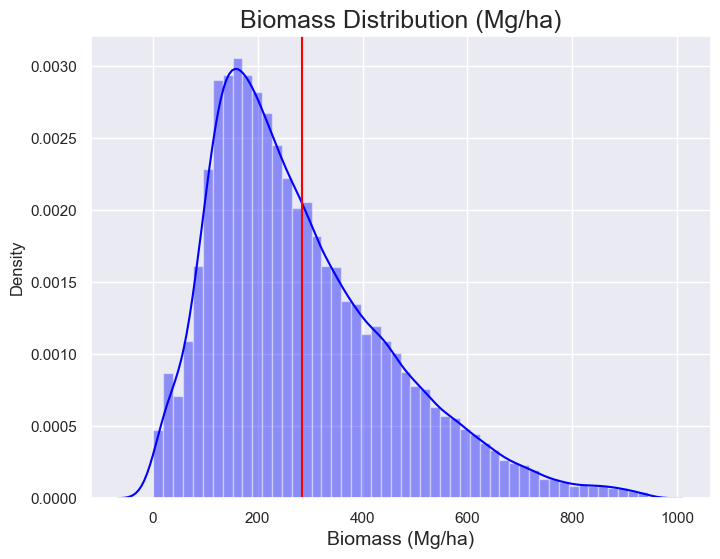

count    29435.000000
mean       283.520367
std        172.735100
min          1.000000
25%        154.000000
50%        244.000000
75%        382.000000
max        944.000000
Name: agbd, dtype: float64


In [21]:
import seaborn as sns
# Histogram
# sns.histplot(x = masterdf['agbd'], hue = masterdf['Year'], palette = "Set1")
sns.distplot(x = masterdf['agbd'], color='blue')

# Calculating the mean
mean = masterdf['agbd'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')
plt.title("Biomass Distribution (Mg/ha)", fontsize=18)
plt.xlabel("Biomass (Mg/ha)", fontsize=14)
plt.show()

print(masterdf['agbd'].describe())


### Let's plot some graphs and see how the data looks like

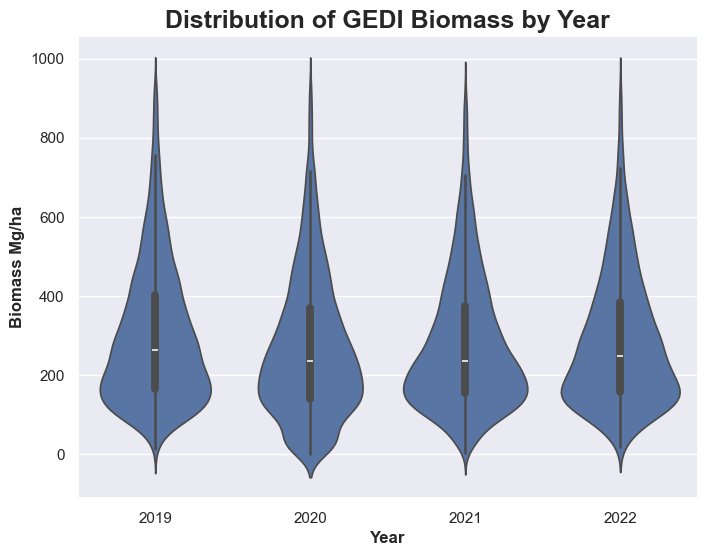

In [22]:
sns.violinplot(x = masterdf['Year'], y = masterdf['agbd'])

plt.title("Distribution of GEDI Biomass by Year", fontsize=18,fontweight = 'bold')
# plt.xlabel("Biomass log-scale (Mg/ha)", fontsize=14)
# plt.ylabel("Distribution", fontsize=14)

plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Biomass Mg/ha",fontweight = 'bold')

# plt.legend()
plt.show()

<Axes: xlabel='GAP_StatusCode', ylabel='agbd'>

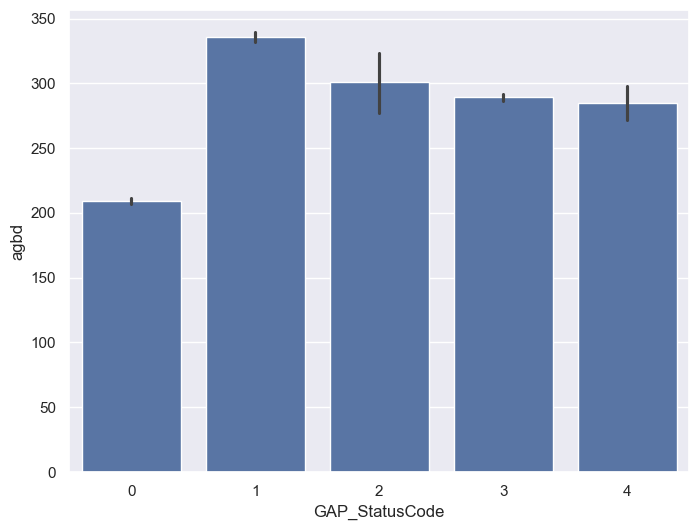

In [23]:
sns.barplot(x = masterdf['GAP_StatusCode'], y = masterdf['agbd'])
# sns.bar_label(sns.containers[0])

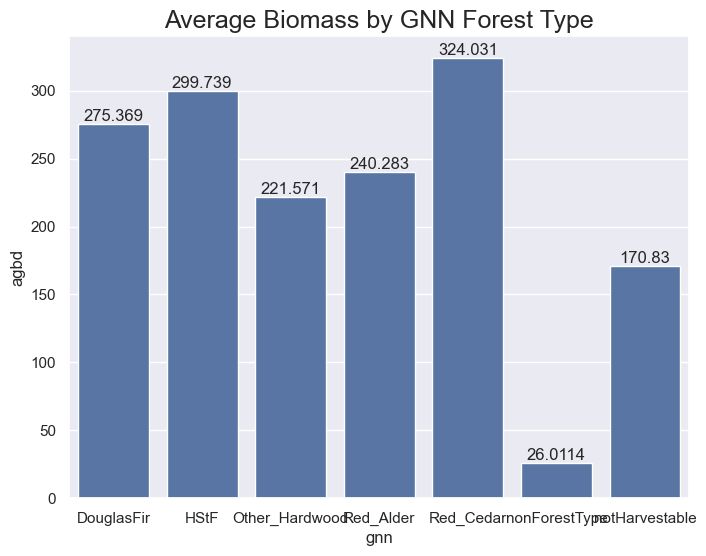

In [24]:
ax = sns.barplot(x = masterdf['gnn'], y = masterdf['agbd'], ci=None)
ax.bar_label(ax.containers[0])

plt.title("Average Biomass by GNN Forest Type", fontsize=18)
# plt.xlabel("Biomass log-scale (Mg/ha)", fontsize=14)
# plt.ylabel("Distribution", fontsize=14)

# plt.legend()
plt.show()

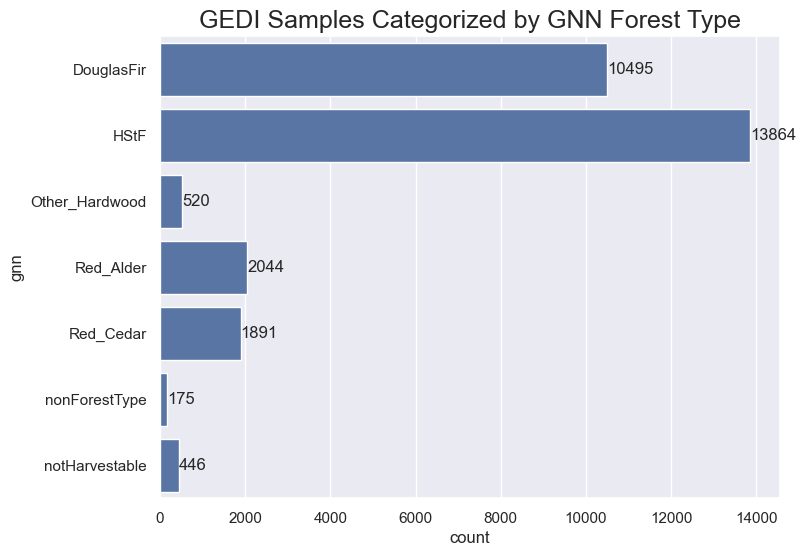

In [25]:
ax = sns.countplot(masterdf['gnn'])
ax.bar_label(ax.containers[0])
plt.title("GEDI Samples Categorized by GNN Forest Type", fontsize=18)
# plt.xlabel("Biomass log-scale (Mg/ha)", fontsize=14)
# plt.ylabel("Distribution", fontsize=14)

# plt.legend()
plt.show()

In [26]:
masterdf2019 = masterdf[masterdf['Year'] == 2019] # r2 63%
masterdf2020 = masterdf[masterdf['Year'] == 2020] # r2 63%
masterdf2021 = masterdf[masterdf['Year'] == 2021] # r2 60%
masterdf2022 = masterdf[masterdf['Year'] == 2022] # r2 62%

# Subset Table Based on the Literature Review and Project Needs

In [27]:
masterdfForest = (masterdf[(masterdf['beamType'] == "FullPower") & # Subset by Full Power
                                (masterdf['RH98_check'] <= 1) & # Subset by RH98 Check
                                (masterdf['pwrMorans_Full_FINAL'] == "Positive") # Subset by Morans I 
#                               (masterdf_PWR['elevCheck_v99'] <= 4)) 
#                               ((masterdf_PWR['NDSI'] <= 0.1) | (masterdf_PWR['NDSI'] <= 0.1))
                               ]) #pwrMorans_Full_Final_RH98 / # pwrMorans_Full_FINAL

masterdfForest

,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,HStF,...,NDPI,NDII,IPCA,GLI,ExBlue,ExGreen,ExRed,saturation,sinHue,cosHue
1,2019,0.890196,0,10,0,0,4758,-0.334307,20.052362,0,...,4799.154334,4043.076923,1009.672,584.389048,2571.825507,-397.332592,545.151431,3510.781671,-0.618877,-0.785488
2,2019,0.733333,0,42,0,0,7151,-0.082763,67.985329,0,...,6168.572824,4628.759398,1012.830,508.779829,2646.717557,-345.038168,410.992366,3811.953353,-0.594568,-0.804045
3,2019,0.568627,83,16,0,0,1507,0.297420,94.174171,1,...,2173.545136,724.269377,975.958,1179.039301,2861.818182,-818.181818,732.121212,3595.988539,-0.720980,-0.692956
4,2019,0.580392,20,18,0,0,6336,0.193652,87.120468,1,...,5684.548352,3890.944979,989.934,555.308752,2626.433313,-377.187689,467.712734,3700.217234,-0.606524,-0.795066
5,2019,0.654902,1,10,0,0,7014,-0.008698,104.948120,1,...,6209.604005,5130.111524,1121.041,529.709811,2804.001250,-359.487340,270.084401,4210.909091,-0.587200,-0.809442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17283,2022,0.549020,0,22,0,1,5720,0.099484,220.317871,0,...,7686.478768,5202.231520,922.242,347.284061,3471.471471,-234.234234,-539.339339,5962.500000,-0.536605,-0.843834
17284,2022,0.615686,0,3,0,1,5537,0.023195,76.590591,0,...,7653.805875,5481.049563,902.457,171.325518,3374.848851,-114.873035,-577.992745,5926.395939,-0.518334,-0.855178
17285,2022,0.596078,0,1,0,1,5091,0.067455,76.770439,0,...,7408.914075,5135.135135,892.917,213.903743,3350.089767,-143.626571,-520.646320,5833.333333,-0.523368,-0.852107
17286,2022,0.619608,0,8,0,1,5777,0.045287,85.096001,0,...,7737.394825,5636.110143,894.590,115.555556,3305.175491,-77.334920,-550.862582,5831.234257,-0.512677,-0.858581


Use this query if you want to include "outliers" that are in non protected areas

In [28]:
# # masterdfForest = masterdf_PWR[masterdf_PWR['pwrMorans_Full'] == "Positive"]
# masterdfForest = (masterdf_PWR[((masterdf_PWR['RH98_check'] <= 1) 
# #                                 &(masterdf_PWR['elevCheck_v99'] <= 3) 
#                                 & (masterdf_PWR['pwrMorans_Full_FINAL'] == "Positive")) 
#                                | 
#                                ((masterdf_PWR['RH98_check'] <= 1)  
# #                                 &(masterdf_PWR['elevCheck_v99'] <= 3) 
#                                 &((masterdf_PWR['pwrMorans_Full_FINAL'] == "Negative") 
#                                   & (masterdf_PWR['GAP_StatusCode']<=2)))])
# masterdfForest

Use this query if you want to just subset to all non outliers regardless of protection status:
This will result in the best model

In [29]:
# masterdfForest = (masterdf_PWR[((masterdf_PWR['RH98_check'] <= 1) 
#                                 & (masterdf_PWR['pwrMorans_Full_FINAL'] == "Positive"))
# #                                 & (masterdf_PWR['Year'] <= 2021)) 
# #                                 & ((masterdf_PWR['NDSI'] <= 0.1) | (masterdf_PWR['NDSI'] <= 0.1))
#                                ]) #pwrMorans_Full_Final_RH98 / # pwrMorans_Full_FINAL

# masterdfForest

Use this query to filter by GAP Status Code. Here we are filtering to nonProtected Areas

In [30]:
# masterdfForest = (masterdf_PWR[((masterdf_PWR['RH98_check'] <= 1) 
# #                                 & (masterdf_PWR['pwrMorans_Full_FINAL'] == "Positive"))
#                                & (masterdf_PWR['GAP_StatusCode']==0)
# #                                 & (masterdf_PWR['elevCheck_v99'] <= 4)) 
# #                                 & ((masterdf_PWR['NDSI'] <= 0.1) | (masterdf_PWR['NDSI'] <= 0.1))
                              
#                                )]) #pwrMorans_Full_Final_RH98 / # pwrMorans_Full_FINAL

# masterdfForest

In [31]:
masterdfForest['agbd'].describe()

count    17287.000000
mean       291.000000
std        188.169272
min          1.000000
25%        147.000000
50%        241.000000
75%        412.000000
max        944.000000
Name: agbd, dtype: float64

In [32]:
### COME BACK!!!

# masterdfForest = masterdf_PWR[((masterdf_PWR['pwrElevDiffCheck'] <3) & (masterdf_PWR['pwrMorans_ElevDiff'] =='Positive'))]
# masterdfForest['agbd'].describe()

In [1]:
plt.figure(figsize=(10,8))

ax = sns.countplot(masterdfForest['gnn'])
ax.bar_label(ax.containers[0])
plt.title("Distribution of GEDI Samples Across GNN Forest Type", fontsize=18, fontweight = 'bold')
# plt.xlabel("Biomass log-scale (Mg/ha)", fontsize=14)
# plt.ylabel("Distribution", fontsize=14)
plt.xlabel("GNN Forest Type", fontweight = 'bold')
plt.ylabel("Count",fontweight = 'bold')
# plt.legend()
plt.show()

NameError: name 'plt' is not defined

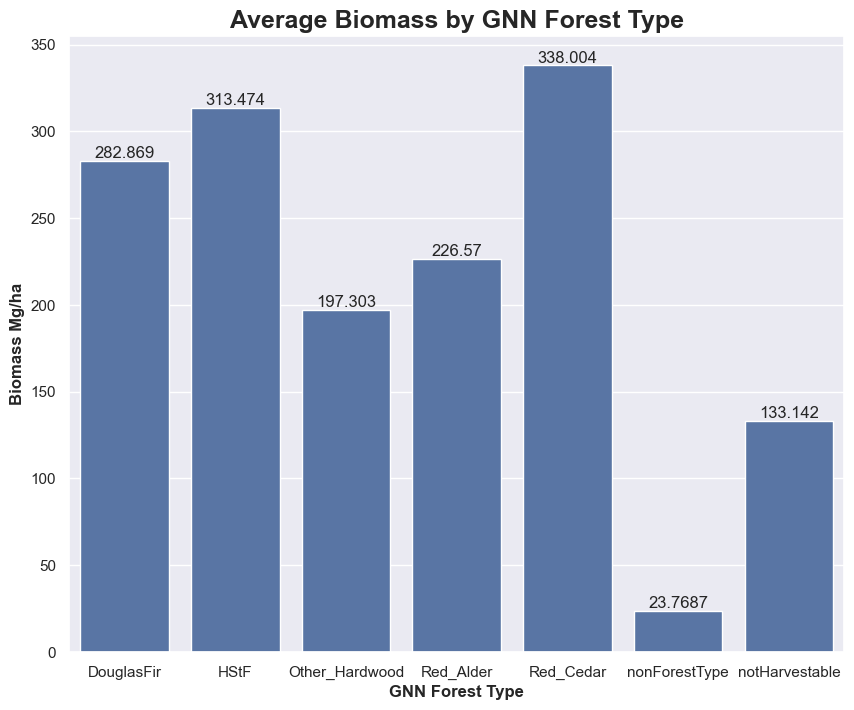

In [34]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = masterdfForest['gnn'], y = masterdfForest['agbd'], ci=None)
ax.bar_label(ax.containers[0])

plt.title("Average Biomass by GNN Forest Type", fontsize=18,fontweight = 'bold')
# plt.xlabel("Biomass log-scale (Mg/ha)", fontsize=14)
# plt.ylabel("Distribution", fontsize=14)

plt.xlabel("GNN Forest Type", fontweight = 'bold')
plt.ylabel("Biomass Mg/ha",fontweight = 'bold')

# plt.legend()
plt.show()

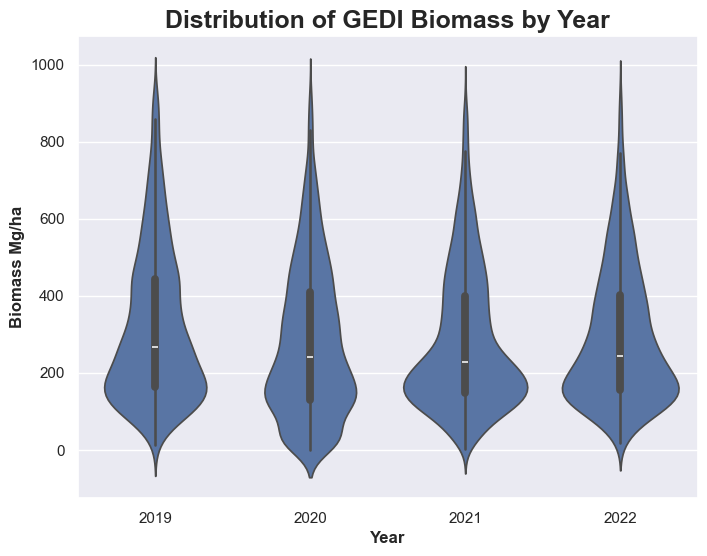

In [35]:
sns.violinplot(x = masterdfForest['Year'], y = masterdfForest['agbd'])

plt.title("Distribution of GEDI Biomass by Year", fontsize=18,fontweight = 'bold')
# plt.xlabel("Biomass log-scale (Mg/ha)", fontsize=14)
# plt.ylabel("Distribution", fontsize=14)

plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Biomass Mg/ha",fontweight = 'bold')

# plt.legend()
plt.show()

## Apply Final Subset

In [46]:
## Check this on to view Morans Positive
# masterdf = masterdf_topGun
masterdf = masterdfForest

291.0


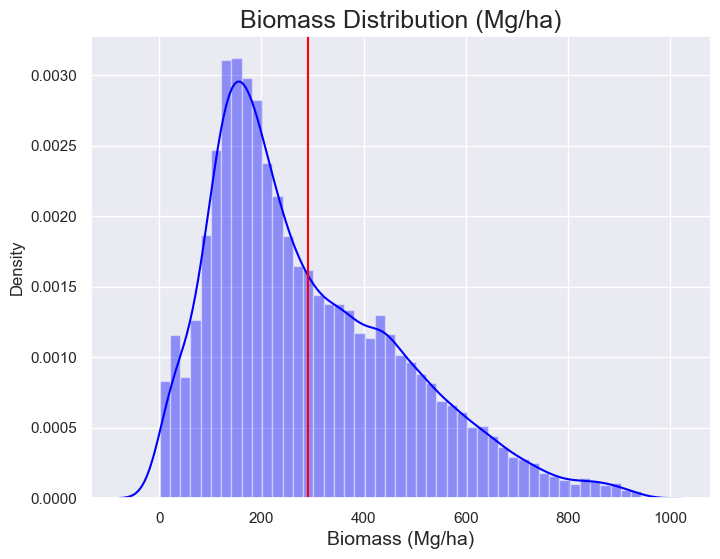

count    17287.000000
mean       291.000000
std        188.169272
min          1.000000
25%        147.000000
50%        241.000000
75%        412.000000
max        944.000000
Name: agbd, dtype: float64

In [47]:
import seaborn as sns

# Histogram
# sns.histplot(x = masterdf['agbd'], hue = masterdf['Year'], palette = "Set1")
sns.distplot(x = masterdf['agbd'], color='blue')


# Calculating the mean
mean = masterdf['agbd'].mean()
print(mean)

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

plt.title("Biomass Distribution (Mg/ha)", fontsize=18)
plt.xlabel("Biomass (Mg/ha)", fontsize=14)

plt.show()

masterdf['agbd'].describe()

### Fix Multi
This applies a rescaling factor to these variables to staty consistent with GEE downloads

In [48]:
fixMulti_01 = [
    'cosAspect','sinAspect',          
]

fixMulti_02 = [
    'slope',        
]

fixMulti_03 = [
    'tpi11','tpi21','tpi41','FabDEM'            
]

masterdf[fixMulti_01] = masterdf[fixMulti_01].multiply(10000).astype(np.int16)
masterdf[fixMulti_02] = masterdf[fixMulti_02].multiply(100).astype(np.int16)
masterdf[fixMulti_03] = masterdf[fixMulti_03].multiply(10).astype(np.int16)


In [49]:
masterdf

,Year,ALOS_Chili_HeatLoad,Change_Raw_Probability_Fast_Loss,Change_Raw_Probability_Gain,Change_Raw_Probability_Slow_Loss,DouglasFir,EVI,EastnessExposure,FabDEM,HStF,...,NDPI,NDII,IPCA,GLI,ExBlue,ExGreen,ExRed,saturation,sinHue,cosHue
1,2019,0.890196,0,10,0,0,4758,-0.334307,200,0,...,4799.154334,4043.076923,1009.672,584.389048,2571.825507,-397.332592,545.151431,3510.781671,-0.618877,-0.785488
2,2019,0.733333,0,42,0,0,7151,-0.082763,679,0,...,6168.572824,4628.759398,1012.830,508.779829,2646.717557,-345.038168,410.992366,3811.953353,-0.594568,-0.804045
3,2019,0.568627,83,16,0,0,1507,0.297420,941,1,...,2173.545136,724.269377,975.958,1179.039301,2861.818182,-818.181818,732.121212,3595.988539,-0.720980,-0.692956
4,2019,0.580392,20,18,0,0,6336,0.193652,871,1,...,5684.548352,3890.944979,989.934,555.308752,2626.433313,-377.187689,467.712734,3700.217234,-0.606524,-0.795066
5,2019,0.654902,1,10,0,0,7014,-0.008698,1049,1,...,6209.604005,5130.111524,1121.041,529.709811,2804.001250,-359.487340,270.084401,4210.909091,-0.587200,-0.809442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17283,2022,0.549020,0,22,0,1,5720,0.099484,2203,0,...,7686.478768,5202.231520,922.242,347.284061,3471.471471,-234.234234,-539.339339,5962.500000,-0.536605,-0.843834
17284,2022,0.615686,0,3,0,1,5537,0.023195,765,0,...,7653.805875,5481.049563,902.457,171.325518,3374.848851,-114.873035,-577.992745,5926.395939,-0.518334,-0.855178
17285,2022,0.596078,0,1,0,1,5091,0.067455,767,0,...,7408.914075,5135.135135,892.917,213.903743,3350.089767,-143.626571,-520.646320,5833.333333,-0.523368,-0.852107
17286,2022,0.619608,0,8,0,1,5777,0.045287,850,0,...,7737.394825,5636.110143,894.590,115.555556,3305.175491,-77.334920,-550.862582,5831.234257,-0.512677,-0.858581


In [51]:
list(masterdf.columns)

['Year',
 'ALOS_Chili_HeatLoad',
 'Change_Raw_Probability_Fast_Loss',
 'Change_Raw_Probability_Gain',
 'Change_Raw_Probability_Slow_Loss',
 'DouglasFir',
 'EVI',
 'EastnessExposure',
 'FabDEM',
 'HStF',
 'Land_Cover_Raw_Probability_Trees',
 'NBR',
 'NDMI',
 'NorthnessExposure',
 'Other_Hardwood',
 'Red_Alder',
 'Red_Cedar',
 'SAVI',
 'agbd',
 'brightness',
 'cosAspect',
 'foldedAspect_NE_SW',
 'foldedAspect_N_S',
 'green',
 'greenness',
 'lat',
 'lcms_Gain',
 'lcms_SlowLoss',
 'lcms_Stable',
 'lcms_fastLoss',
 'lon',
 'nir',
 'nonForestType',
 'notHarvestable',
 'red',
 'sinAspect',
 'slope',
 'swir1',
 'swir2',
 'tcAngleBG',
 'tcAngleBW',
 'tcAngleGW',
 'tcDistBG',
 'tcDistBW',
 'tcDistBW_asm',
 'tcDistBW_contrast',
 'tcDistBW_corr',
 'tcDistBW_dent',
 'tcDistBW_dvar',
 'tcDistBW_ent',
 'tcDistBW_idm',
 'tcDistBW_imcorr1',
 'tcDistBW_imcorr2',
 'tcDistBW_savg',
 'tcDistBW_sent',
 'tcDistBW_svar',
 'tcDistBW_var',
 'tcDistGW',
 'tpi11',
 'tpi21',
 'tpi41',
 'uniqid',
 'wetness',
 'valu

### Save Prepared Data Table

In [54]:
outDir = "D:/Argus/BDe2/tables"
outName = "GEDI_Kenobi_Prepared_Table_20250321.csv"
outPath = os.path.join(outDir,outName)

masterdf.to_csv(outPath,index=False, encoding='utf-8-sig')

### Done with Data Prepartation Part 01
Move to Script 02 to Data Prepartion Part 02
